In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
data=pd.read_csv('Boston-house-price-data.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data['PRICE']=data['MEDV']

In [14]:
data=data.drop('MEDV',axis=1)   #I did this because, in the table a duplicate of MEDV column was made. I thought of renaming but instead I made a copy of it

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:ylabel='Frequency'>

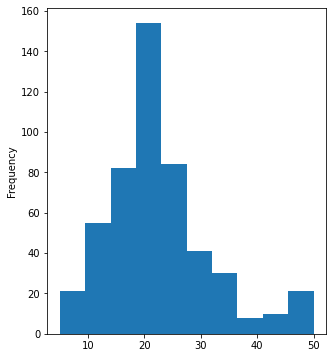

In [7]:
plt.figure(figsize=(5,6))
data['PRICE'].plot.hist(bins=10)

Text(0.5, 1.0, 'Distribution of housing prices w.r.t. RM')

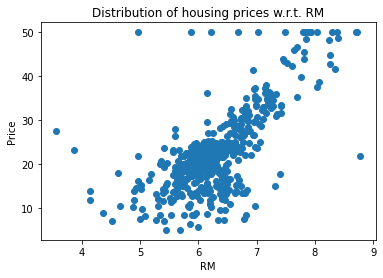

In [8]:
plt.scatter(data['RM'],data['PRICE'])
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Distribution of housing prices w.r.t. RM')

Text(0.5, 1.0, 'Distribution of housing prices w.r.t. LSTAT')

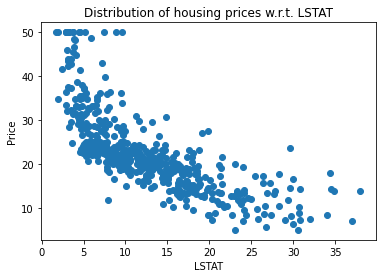

In [9]:
plt.scatter(data['LSTAT'],data['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.title('Distribution of housing prices w.r.t. LSTAT')

In [16]:
x=data.drop('PRICE',axis=1)
y=data['PRICE']

In [18]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc_x= StandardScaler()
sc_y= StandardScaler()
X_train= sc_x.fit_transform(X_train)
X_test= sc_x.fit_transform(X_test)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.25, random_state=5)

In [31]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_pred=lr.predict(X_test)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

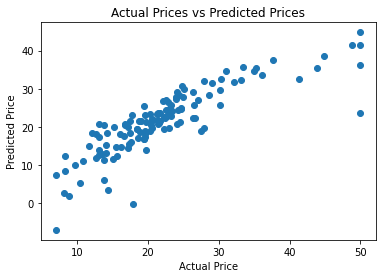

In [33]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

In [39]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [41]:
lr.score(X_train,Y_train)

0.7468034208269783

In [43]:
adj_r2(X_train,Y_train)

0.7377854604728706

In [45]:
lr.score(X_test,Y_test)

0.705909607109805

In [46]:
adj_r2(X_test,Y_test)

0.6720761990781896